# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Machine Learning for Financial Inclusion by University of Eswatini on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install kmodes

In [3]:
#from kmodes.kprototypes import KPrototypes

### Read files

In [4]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

### Some basic EDA

In [5]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [6]:
# Preview the first five rows of the train set
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
# Preview the first five rows of the test set
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [8]:
# Preview the first five rows of the sample submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [9]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (23524, 13)
The shape of the test set is: (10086, 12)


## Combine train and test set for easy preprocessing 

In [10]:
# mapping the bank account with 0 to NO and 1 to YES
train['bank_account'] = train['bank_account'].map({'No':0, 'Yes':1})

In [11]:
train['bank_account'].sum()

3312

In [12]:
train.isnull().count()

country                   23524
year                      23524
uniqueid                  23524
bank_account              23524
location_type             23524
cellphone_access          23524
household_size            23524
age_of_respondent         23524
gender_of_respondent      23524
relationship_with_head    23524
marital_status            23524
education_level           23524
job_type                  23524
dtype: int64

In [13]:
test.isnull().count()

country                   10086
year                      10086
uniqueid                  10086
location_type             10086
cellphone_access          10086
household_size            10086
age_of_respondent         10086
gender_of_respondent      10086
relationship_with_head    10086
marital_status            10086
education_level           10086
job_type                  10086
dtype: int64

In [14]:
# test data mapping
#test['location_type'] = test['location_type'].map({'Rural':0, 'Urban':1})
#test['cellphone_access'] = test['cellphone_access'].map({'No':0, 'Yes':1})
#test['gender_of_respondent'] = test['gender_of_respondent'].map({'Female':0, 'Male':1})

In [15]:
# # Combine train and test set
# ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

# all_data = pd.concat((train, test)).reset_index(drop=True)
# print(f'The shape of the combined dataframe is: {all_data.shape}')

In [16]:
# # Preview the last five rows of the combined dataframe
# all_data.tail()

In [17]:
# df = all_data[['gender_of_respondent','location_type','household_size']]

In [18]:
# # define categorical variables of df
# df_categorical_features_column = [0,1]

In [17]:
# # Elbow curve to find optimal K
# # choosing optimal k
# cost = []
# K = range(1,8)
# mark_array = df.values
# for num_clusters in list(K):
#     try:
#         kproto = KPrototypes(n_clusters=num_clusters, verbose=0, max_iter=20)
#         kproto.fit(mark_array, categorical=df_categorical_features_column)
#         cost.append(kproto.cost_)
#         print('Cluster initiation: {}'.format(num_clusters))
        
#     except:
#         break
        
# plt.plot(K, cost, 'bx-')
# plt.xlabel('No. of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [18]:
# # Building the model with 3 clusters
# num_cluster = 3

# kproto = KPrototypes(n_clusters=num_cluster, verbose=0, max_iter=20).fit(df.values, categorical=df_categorical_features_column)
# clusters = kproto.predict(mark_array, categorical=df_categorical_features_column)

In [19]:
# test.age_of_respondent.unique()

In [20]:
# # function for categorzing age of respondents
# def age_of_respondent_cat(x):
#     if x < 40:
#         return 'youth'
#     elif x >= 40 and x < 65:
#         return 'life'
#     elif x >= 65:
#         return 'old'

In [21]:
# all_data['age_of_respondent'] = all_data['age_of_respondent'].apply(age_of_respondent_cat)

In [21]:
# all_data.education_level.unique()

In [17]:
# all_data['education_level'].replace(['No formal education', 'Primary education'], 'below_secondary', inplace=True)

In [18]:
# all_data['education_level'].replace(['Tertiary education', 'Vocational/Specialised training'], 'Post secondary', inplace=True)

In [19]:
# all_data['education_level'].replace('Other/Dont know/RTA', 'below_secondary', inplace=True)

In [22]:
# # Check the column names and datatypes
# all_data.info()

In [23]:
# all_data['age_of_respondent'].unique()

In [24]:
# all_data['education_level'].unique()

In [25]:
# # function for categorzing household size
# def household_size_cat(x):
#     if x <= 2:
#         return 'small'
#     elif x > 2 and x <= 4:
#         return 'medium'
#     elif x > 4:
#         return 'big'

In [24]:
# all_data['household_size'] = all_data['household_size'].apply(household_size_cat)

In [26]:
# all_data.household_size.unique()

In [27]:
# all_data.relationship_with_head.unique()

In [28]:
# all_data['relationship_with_head'].replace(['Other relative','Other non-relatives'], 'other', inplace=True)

In [29]:
# all_data.marital_status.value_counts()

In [29]:
# all_data['marital_status'].replace('Dont know', 'Divorced/Seperated', inplace=True)

In [16]:
# Loading the csv file created in pycaret
all_data = pd.read_csv('all data_updated.csv')

In [17]:
all_data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,clusters,house_size_cat,compress_edu_leve,bank_depend,age_of_respondent_categ
0,Kenya,2018,1.0,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,0,medium,Secondary education,Non Bank Account Dependent,youth
1,Kenya,2018,0.0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,0,large,Below Secondary,Bank Account Dependent,old
2,Kenya,2018,1.0,Urban,Yes,5,26,Male,Other,Single/Never Married,Vocational/Specialised training,Self employed,0,large,Post Secondary,Non Bank Account Dependent,youth
3,Kenya,2018,0.0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0,large,Below Secondary,Bank Account Dependent,youth
4,Kenya,2018,0.0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,1,large,Below Secondary,Non Bank Account Dependent,youth


In [18]:
all_data.drop(['age_of_respondent_categ', 'house_size_cat', 'clusters'], axis=1, inplace=True)
all_data.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,compress_edu_leve,bank_depend
0,Kenya,2018,1.0,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Secondary education,Non Bank Account Dependent
1,Kenya,2018,0.0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Below Secondary,Bank Account Dependent
2,Kenya,2018,1.0,Urban,Yes,5,26,Male,Other,Single/Never Married,Vocational/Specialised training,Self employed,Post Secondary,Non Bank Account Dependent
3,Kenya,2018,0.0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Below Secondary,Bank Account Dependent
4,Kenya,2018,0.0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,Below Secondary,Non Bank Account Dependent


In [19]:
all_data.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'compress_edu_leve', 'bank_depend'],
      dtype='object')

In [20]:
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

In [21]:
# Check unique values for each categorical column, we removed age_of_respondent and household_size
cat_cols = ['year','gender_of_respondent','cellphone_access','location_type','country',
            'relationship_with_head', 'marital_status', 'education_level',	'job_type', 
            'compress_edu_leve', 'bank_depend']
for col in cat_cols:
  print(col)
  print(all_data[col].unique(), '\n')

year
[2018 2016 2017] 

gender_of_respondent
['Female' 'Male'] 

cellphone_access
['Yes' 'No'] 

location_type
['Rural' 'Urban'] 

country
['Kenya' 'Rwanda' 'Tanzania' 'Uganda'] 

relationship_with_head
['Spouse' 'Head of Household' 'Other' 'Child' 'Parent'] 

marital_status
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated'] 

education_level
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education'] 

job_type
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income'] 

compress_edu_leve
['Secondary education' 'Below Secondary' 'Post Secondary'
 'Below education'] 

bank_depend
['Non Bank Account Dependent' 'Bank Account Dependent'] 



In [22]:
# Encode categorical features
all_data = pd.get_dummies(data = all_data, columns = cat_cols, drop_first=True)
all_data.head()

,bank_account,household_size,age_of_respondent,year_2017,year_2018,gender_of_respondent_Male,cellphone_access_Yes,location_type_Urban,country_Rwanda,country_Tanzania,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,compress_edu_leve_Below education,compress_edu_leve_Post Secondary,compress_edu_leve_Secondary education,bank_depend_Non Bank Account Dependent
0,1.0,3,24,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0.0,5,70,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.0,5,26,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0.0,5,34,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,8,26,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [23]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((23524, 35), (10086, 35))

In [24]:
main_cols = all_data.columns.difference(['bank_account'])
main_cols

Index(['age_of_respondent', 'bank_depend_Non Bank Account Dependent',
       'cellphone_access_Yes', 'compress_edu_leve_Below education',
       'compress_edu_leve_Post Secondary',
       'compress_edu_leve_Secondary education', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'gender_of_respondent_Male', 'household_size',
       'job_type_Farming and Fishing', 'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informally employed', 'job_type_No Income',
       'job_type_Other Income', 'job_type_Remittance Dependent',
       'job_type_Self employed', 'location_type_Urban',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',


In [25]:
# Select main columns to be used in training
#main_cols = all_data.columns.difference(date_cols+['ID', 'bank_account'])
#main_cols = all_data.columns.difference('bank_account')
X = train_df[main_cols]
y = train_df['bank_account']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [26]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [27]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(Counter(y_train))

Counter({0.0: 14139, 1.0: 14139})


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Distribution of the target variable

In [42]:
# sns.countplot(train.bank_account)
# plt.title('Target Distribution', fontdict={'size':14});

In [43]:
# sns.countplot(train.location_type)
# plt.title('Location Distribution', fontdict={'size':14});

In [44]:
# sns.countplot(train.cellphone_access)
# plt.title('Cellphone Access Distribution', fontdict={'size':14});

Here we see the overall distribution for the whole train set. Can you see if there are any differences due to country?

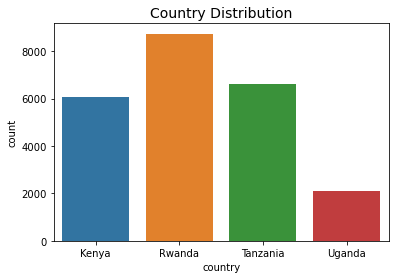

In [24]:
# sns.countplot(train.country)
# plt.title('Country Distribution', fontdict={'size':14});

## Exploratory Data Analysis

Text(0.5, 0, 'Country')

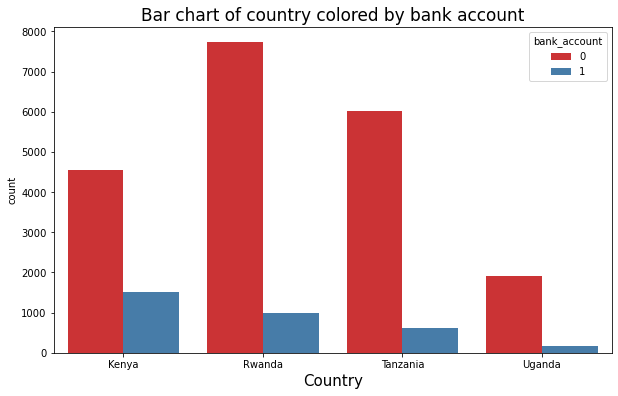

In [25]:
# plt.figure(figsize=(10,6))
# sns.countplot(x='country',hue='bank_account',data=train, palette='Set1')
# plt.title("Bar chart of country colored by bank account", fontsize=17)
# plt.xlabel("Country", fontsize=15)

Text(0.5, 0, 'Cellphone access')

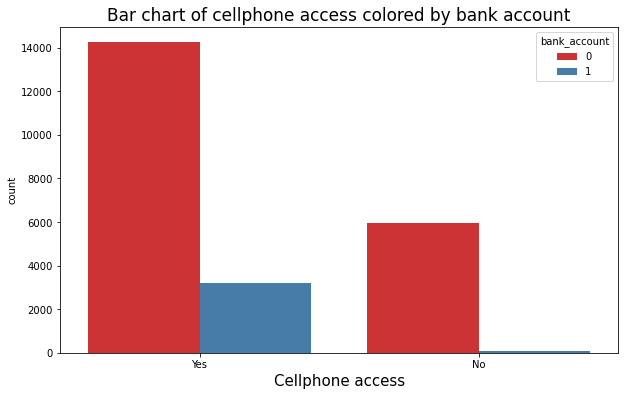

In [26]:
# plt.figure(figsize=(10,6))
# sns.countplot(x='cellphone_access',hue='bank_account',data=train, palette='Set1')
# plt.title("Bar chart of cellphone access colored by bank account", fontsize=17)
# plt.xlabel("Cellphone access", fontsize=15)

Text(0.5, 0, 'location type')

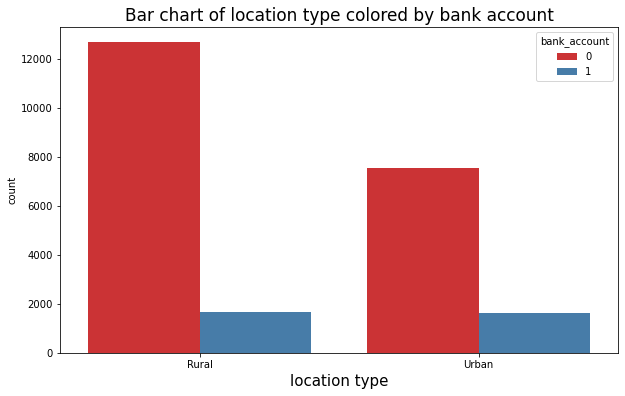

In [27]:
# plt.figure(figsize=(10,6))
# sns.countplot(x='location_type',hue='bank_account',data=train, palette='Set1')
# plt.title("Bar chart of location type colored by bank account", fontsize=17)
# plt.xlabel("location type", fontsize=15)

In [28]:
# # Interesting visualization for location type
# train_lt = train[['location_type','bank_account']]
# train_lt = train_lt.groupby(['location_type']).sum()
# train_lt

,bank_account
location_type,
Rural,1671
Urban,1641


Text(0.5, 0, 'education level')

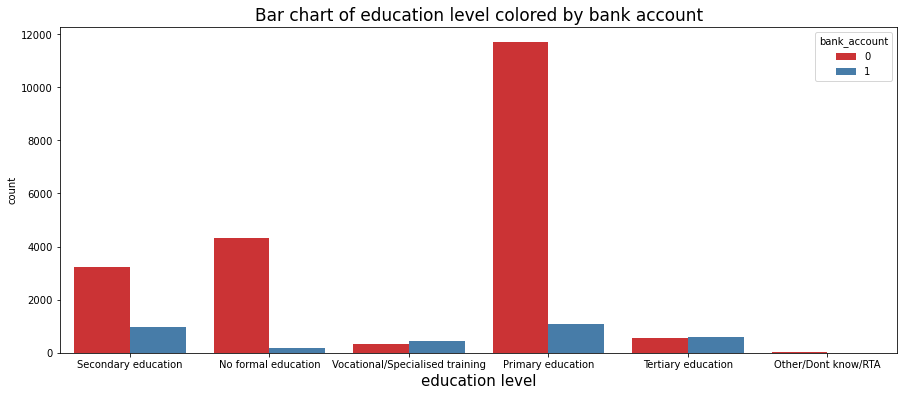

In [29]:
# plt.figure(figsize=(15,6))
# sns.countplot(x='education_level',hue='bank_account',data=train, palette='Set1')
# plt.title("Bar chart of education level colored by bank account", fontsize=17)
# plt.xlabel("education level", fontsize=15)

Text(0.5, 0, 'job type')

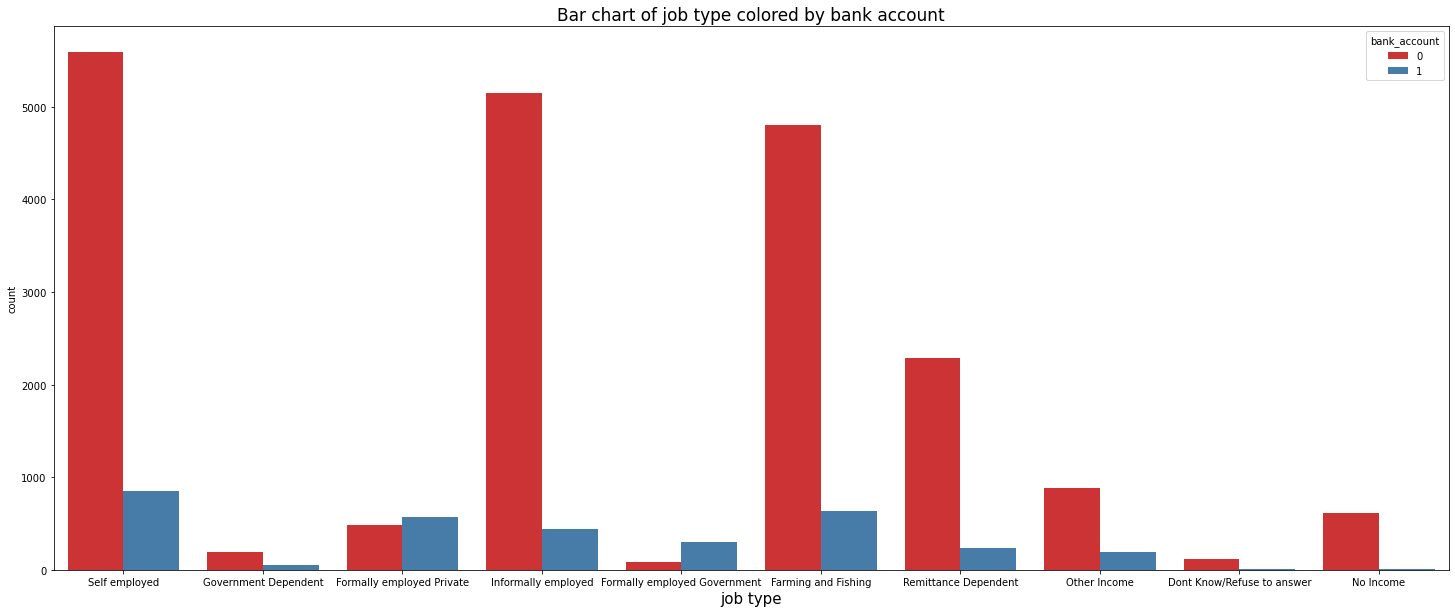

In [30]:
# plt.figure(figsize=(25,10))
# sns.countplot(x='job_type',hue='bank_account',data=train, palette='Set1')
# plt.title("Bar chart of job type colored by bank account", fontsize=17)
# plt.xlabel("job type", fontsize=15)

Text(0.5, 0, 'marital status')

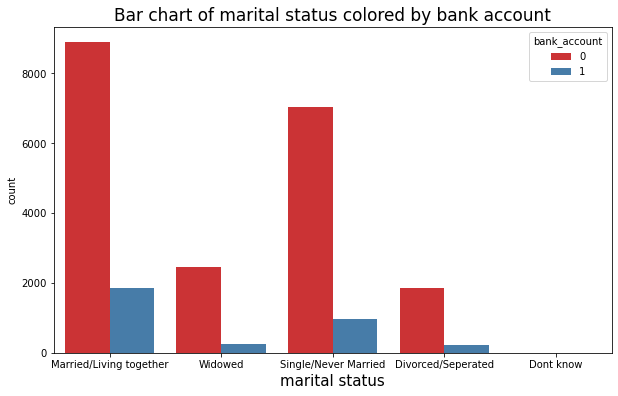

In [31]:
# plt.figure(figsize=(10,6))
# sns.countplot(x='marital_status',hue='bank_account',data=train, palette='Set1')
# plt.title("Bar chart of marital status colored by bank account", fontsize=17)
# plt.xlabel("marital status", fontsize=15)

Text(0.5, 0, 'relationship with head')

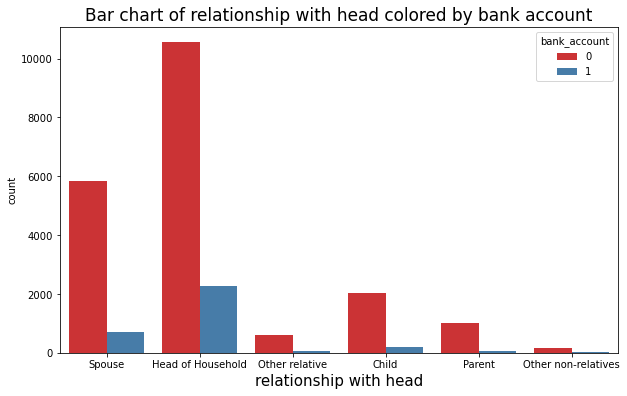

In [32]:
# plt.figure(figsize=(10,6))
# sns.countplot(x='relationship_with_head',hue='bank_account',data=train, palette='Set1')
# plt.title("Bar chart of relationship with head colored by bank account", fontsize=17)
# plt.xlabel("relationship with head", fontsize=15)

Text(0.5, 0, 'year')

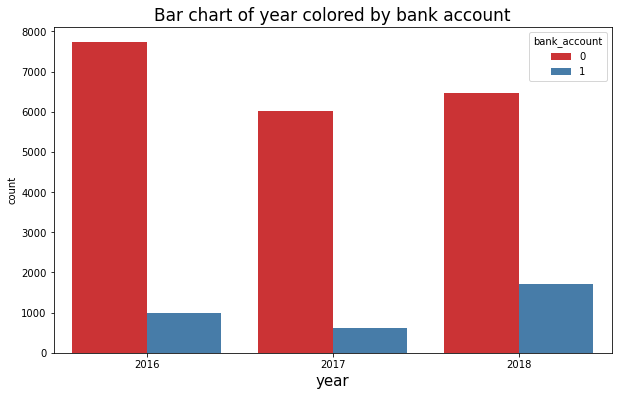

In [33]:
# plt.figure(figsize=(10,6))
# sns.countplot(x='year',hue='bank_account',data=train, palette='Set1')
# plt.title("Bar chart of year colored by bank account", fontsize=17)
# plt.xlabel("year", fontsize=15)

In [34]:
# print('Number of observations for the year 2016: ', train[train['year'] == 2016].shape[0])
# print(' ')
# print('Number of 0servations for the year 2017: ', train[train['year'] == 2017].shape[0])
# print(' ')
# print('Number of 0servations for the year 2018: ', train[train['year'] == 2018].shape[0])

Number of observations for the year 2016:  8735
 
Number of 0servations for the year 2017:  6620
 
Number of 0servations for the year 2018:  8169


In [35]:
# train_year = train[['year','bank_account']]
# train_year = train_year.groupby(['year']).sum()
# train_year

,bank_account
year,
2016,1003
2017,607
2018,1702


Clearly feature 'year' behaves like ordinal data

In [35]:
# after running this cell, go back and run the all_data cell
#train['location_type'] = train['location_type'].map({'Rural':0, 'Urban':1})
#train['cellphone_access'] = train['cellphone_access'].map({'No':0, 'Yes':1})
#train['gender_of_respondent'] = train['gender_of_respondent'].map({'Female':0, 'Male':1})

### Number of unique values per categorical column

### Feature Engineering


#### Try different strategies of dealing with categorical variables
Tips:
 - One hot encoding
 - Label encoding
 - Target encoding
 - Reduce the number of unique values...

In [53]:
len(all_data.columns)

41

### Training and making predictions
Tips:
- Is lgbm the best model for this challenge?
- Parameter tuning
 - Grid search, random search, perhaps bayesian search works better...



In [41]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test=sc.transform(X_test)

### checking extratreeclassifier

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

# Train model
et_clf = ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                criterion='gini', max_depth=110, max_features='sqrt',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0, min_impurity_split=None,
                                min_samples_leaf=1, min_samples_split=5,
                                min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=-1,
                                oob_score=False, random_state=123, verbose=0,
                                warm_start=False)

et_clf.fit(X_train, y_train)

# Make predictions
y_pred = et_clf.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      6073
         1.0       0.47      0.51      0.49       985

    accuracy                           0.85      7058
   macro avg       0.69      0.71      0.70      7058
weighted avg       0.86      0.85      0.85      7058

confusion matrix:
 
[[5508  565]
 [ 487  498]]
Accuracy of prediction: 0.851
 
accuracy_score:  0.8509492774156985


In [46]:
# pip install catboost

In [24]:
from catboost import CatBoostClassifier

In [64]:
CatBoostClassifier?

### Checking CatBoostClassifier

In [25]:
# Train model
cb_clf = CatBoostClassifier(verbose=False)
cb_clf.fit(X_train, y_train)

# Make predictions
y_pred = cb_clf.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      6073
         1.0       0.48      0.51      0.49       985

    accuracy                           0.86      7058
   macro avg       0.70      0.71      0.70      7058
weighted avg       0.86      0.86      0.86      7058

confusion matrix:
 
[[5536  537]
 [ 486  499]]
Accuracy of prediction: 0.855
 
accuracy_score:  0.8550580901105129


### Checking gradientboostingclassifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# Train model
gb_clf = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                                    learning_rate=0.29, loss='deviance', max_depth=80,
                                    max_features='auto', max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=2, min_samples_split=10,
                                    min_weight_fraction_leaf=0.0, n_estimators=55,
                                    n_iter_no_change=None,
                                    random_state=123, subsample=0.6500000000000001,
                                    tol=0.0001, validation_fraction=0.1, verbose=0,
                                    warm_start=False)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      6073
         1.0       0.42      0.45      0.44       985

    accuracy                           0.84      7058
   macro avg       0.66      0.68      0.67      7058
weighted avg       0.84      0.84      0.84      7058

confusion matrix:
 
[[5450  623]
 [ 538  447]]
Accuracy of prediction: 0.836
 
accuracy_score:  0.8355058090110513


### Checking LGBMClassifier

In [27]:
# Train model
model = LGBMClassifier(boosting_type='gbdt', objective='binary', class_weight=None, colsample_bytree=1.0,
                        importance_type='split', learning_rate=0.1, max_depth=30,
                        min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
                        n_estimators=100, n_jobs=-1, num_leaves=70, metric ='auc',
                        random_state=123, reg_alpha=0.1, reg_lambda=0.5, silent=True,
                        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      6073
         1.0       0.49      0.51      0.50       985

    accuracy                           0.86      7058
   macro avg       0.71      0.71      0.71      7058
weighted avg       0.86      0.86      0.86      7058

confusion matrix:
 
[[5554  519]
 [ 483  502]]
Accuracy of prediction: 0.858
 
accuracy_score:  0.858033437234344


### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(C=100, penalty= 'l2', solver= 'liblinear')

# C=1.94, class_weight=None, dual=False, fit_intercept=True,
#                             intercept_scaling=1, l1_ratio=None, max_iter=100,
#                             multi_class='auto', n_jobs=-1, penalty='l2',
#                             random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
#                             warm_start=False

lr_clf.fit(X_train, y_train)

# Make predictions
y_pred = lr_clf.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90      6073
         1.0       0.43      0.54      0.48       985

    accuracy                           0.84      7058
   macro avg       0.68      0.71      0.69      7058
weighted avg       0.85      0.84      0.85      7058

confusion matrix:
 
[[5379  694]
 [ 451  534]]
Accuracy of prediction: 0.838
 
accuracy_score:  0.8377727401530178


In [33]:
# GridSearchCV tuning for logistic regression

from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 10, 100]
# define search
search = GridSearchCV(lr_clf, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

NameError: name 'GridSearchCV' is not defined

### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)
           
# Make predictions
y_pred = nb_clf.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83      6073
         1.0       0.31      0.69      0.43       985

    accuracy                           0.74      7058
   macro avg       0.62      0.72      0.63      7058
weighted avg       0.85      0.74      0.78      7058

confusion matrix:
 
[[4565 1508]
 [ 304  681]]
Accuracy of prediction: 0.743
 
accuracy_score:  0.7432700481722868


### RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=23,
                               min_samples_split=5, n_estimators=103, n_jobs=-1,
                               random_state=123)
    


#RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
#criterion='entropy', max_depth=20, max_features='auto',
#max_leaf_nodes=None, max_samples=None,
#min_impurity_decrease=0.0, min_impurity_split=None,
#min_samples_leaf=2, min_samples_split=7,
#min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
#oob_score=False, random_state=123, verbose=0,
#warm_start=False)

rf_clf.fit(X_train, y_train)
#'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 25
# Make predictions
y_pred = rf_clf.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      6073
         1.0       0.44      0.49      0.46       985

    accuracy                           0.84      7058
   macro avg       0.68      0.69      0.69      7058
weighted avg       0.85      0.84      0.85      7058

confusion matrix:
 
[[5463  610]
 [ 503  482]]
Accuracy of prediction: 0.842
 
accuracy_score:  0.842306602436951


In [56]:
from sklearn.model_selection import GridSearchCV

In [91]:
# GridSearchCV tuning for randomforestclassifier

n_estimators = [67, 71, 80, 86, 103]
max_depth = [6, 13, 20, 23, 33]
min_samples_split = [3, 5, 7, 9]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf_clf, hyperF, cv = 5, verbose = 1)
bestF = gridF.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [92]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",bestF.best_estimator_)
print("\n The best score across ALL searched params:\n",bestF.best_score_)
print("\n The best parameters across ALL searched params:\n",bestF.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=23,
                       min_samples_split=5, n_estimators=103, n_jobs=-1,
                       random_state=123)

 The best score across ALL searched params:
 0.8989696004462135

 The best parameters across ALL searched params:
 {'max_depth': 23, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 103}


In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# Randomizedsearchcv tuning for randomforestCV

n_estimators = [50, 100, 120, 150, 200]
max_depth = [5, 8, 15, 20, 25]
min_samples_split = [2, 5, 10, 15, 20, 25]
min_samples_leaf = [1, 2, 5, 8, 15] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF1 = RandomizedSearchCV(rf_clf, hyperF, cv = 5, n_iter=100, verbose = 1)
bestF1 = gridF1.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [64]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",bestF1.best_estimator_)
print("\n The best score across ALL searched params:\n",bestF1.best_score_)
print("\n The best parameters across ALL searched params:\n",bestF1.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=25, n_estimators=50, random_state=0)

 The best score across ALL searched params:
 0.8552595742711823

 The best parameters across ALL searched params:
 {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 25}


### DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                                    max_depth=33, max_features=34, max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=4, min_samples_split=2,
                                    min_weight_fraction_leaf=0.0, 
                                    random_state=123, splitter='best')
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      6073
         1.0       0.37      0.42      0.39       985

    accuracy                           0.82      7058
   macro avg       0.64      0.65      0.64      7058
weighted avg       0.83      0.82      0.83      7058

confusion matrix:
 
[[5387  686]
 [ 575  410]]
Accuracy of prediction: 0.821
 
accuracy_score:  0.8213374893737603


In [32]:
from sklearn.linear_model import RidgeClassifier


rig_clf = RidgeClassifier(normalize=False, random_state=100, tol=0.1)
rig_clf.fit(X_train, y_train)

# Make predictions
y_pred = rig_clf.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      6073
         1.0       0.47      0.52      0.49       985

    accuracy                           0.85      7058
   macro avg       0.69      0.71      0.70      7058
weighted avg       0.86      0.85      0.85      7058

confusion matrix:
 
[[5495  578]
 [ 476  509]]
Accuracy of prediction: 0.851
 
accuracy_score:  0.8506659110229526


### XGboost

In [57]:
# from xgboost import XGBClassifier
# xgb_clf= XGBClassifier()
# xgb_clf.fit(X_train, y_train)
            
# # Make predictions
# y_pred = xgb_clf.predict(X_test)

# # Check the accuracy score of the model
# #accuracy_score(y_pred,y_test)
# from sklearn.metrics import classification_report,confusion_matrix
# # classification report
# print('classification report:')
# print(' ')
# print(classification_report(y_test,y_pred))
# # confusion matrix
# print('confusion matrix:')
# print(' ')
# cm=confusion_matrix(y_test,y_pred)
# print(cm)
# print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
# print(' ')
# print('accuracy_score: ',accuracy_score(y_pred,y_test))

### Trying ensembles

### Ensemble of logistic, naive bayes and decision tree

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [33]:
voting_clf = VotingClassifier(
 estimators=[('lr', lr_clf), ('nb', nb_clf), ('dec', dec_clf)],
 voting='hard')
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      6073
         1.0       0.41      0.57      0.47       985

    accuracy                           0.82      7058
   macro avg       0.67      0.72      0.68      7058
weighted avg       0.85      0.82      0.84      7058

confusion matrix:
 
[[5249  824]
 [ 423  562]]
Accuracy of prediction: 0.823
 
accuracy_score:  0.8233210541229811


### Ensemble of ridge and randomforest

In [34]:
voting_clf2 = VotingClassifier(
 estimators=[('ridge', rig_clf),('rf', rf_clf)],
 voting='hard')
voting_clf2.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf2.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      6073
         1.0       0.60      0.38      0.47       985

    accuracy                           0.88      7058
   macro avg       0.75      0.67      0.70      7058
weighted avg       0.86      0.88      0.87      7058

confusion matrix:
 
[[5824  249]
 [ 607  378]]
Accuracy of prediction: 0.879
 
accuracy_score:  0.8787191839047889


### logistic and random forest

In [35]:
# We submitted result from this for 3rd last submission

voting_clf3 = VotingClassifier(
 estimators=[('lr', lr_clf),('rf', rf_clf)],
 voting='hard')
voting_clf3.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf3.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      6073
         1.0       0.59      0.39      0.47       985

    accuracy                           0.88      7058
   macro avg       0.75      0.67      0.70      7058
weighted avg       0.86      0.88      0.87      7058

confusion matrix:
 
[[5804  269]
 [ 599  386]]
Accuracy of prediction: 0.877
 
accuracy_score:  0.8770189855483139


### logistic, ridge and randomforest

In [52]:
voting_clf4 = VotingClassifier(
 estimators=[('lr', lr_clf), ('ridge', rig_clf), ('rf', rf_clf)],
 voting='hard'
)
voting_clf4.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf4.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      6073
         1.0       0.47      0.53      0.50       985

    accuracy                           0.85      7058
   macro avg       0.70      0.72      0.70      7058
weighted avg       0.86      0.85      0.85      7058

confusion matrix:
 
[[5480  593]
 [ 463  522]]
Accuracy of prediction: 0.85
 
accuracy_score:  0.8503825446302069


### logistic, randomForest, ctboost and lgbmclassifier

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

voting_clf5 = VotingClassifier(
 estimators=[('lr', lr_clf), ('rf', rf_clf), ('lgbm', model), ('cat', cb_clf)],
 voting='hard')
voting_clf5.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf5.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      6073
         1.0       0.52      0.45      0.49       985

    accuracy                           0.87      7058
   macro avg       0.72      0.69      0.70      7058
weighted avg       0.86      0.87      0.86      7058

confusion matrix:
 
[[5669  404]
 [ 539  446]]
Accuracy of prediction: 0.866
 
accuracy_score:  0.8663927458203458


### gradientboost, randomforest, lgbm, catboost

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

voting_clf6 = VotingClassifier(
 estimators=[('gboost', gb_clf), ('rf', rf_clf), ('lgbm', model), ('cat', cb_clf)],
 voting='hard')
voting_clf6.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf6.predict(X_test)

# Check the accuracy score of the model
#accuracy_score(y_pred,y_test)
from sklearn.metrics import classification_report,confusion_matrix
# classification report
print('classification report:')
print(' ')
print(classification_report(y_test,y_pred))
# confusion matrix
print('confusion matrix:')
print(' ')
cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print(' ')
print('accuracy_score: ',accuracy_score(y_pred,y_test))

classification report:
 
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      6073
         1.0       0.54      0.43      0.47       985

    accuracy                           0.87      7058
   macro avg       0.72      0.68      0.70      7058
weighted avg       0.86      0.87      0.86      7058

confusion matrix:
 
[[5711  362]
 [ 566  419]]
Accuracy of prediction: 0.869
 
accuracy_score:  0.8685179937659394


In [64]:
# # view the feature scores for randomforest

# feature_scores = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# feature_scores

In [65]:
# # Creating a seaborn bar plot
# plt.figure(figsize=(10,15))
# sns.barplot(x=feature_scores, y=feature_scores.index)



# # Add labels to the graph

# plt.xlabel('Feature Importance Score')

# plt.ylabel('Features')



# # Add title to the graph

# plt.title("Visualizing Important Features")



# # Visualize the graph

# plt.show()

Accuracy drops, lets drop marital_status_Dont know and job_type_Dont Know/Refuse to answer, then check accuracy

In [59]:
# Select main columns to be used in training
#main_cols = all_data.columns.difference(date_cols+['ID', 'bank_account'])
main_cols = all_data.columns.difference(['uniqueid', 'bank_account'])
X = train_df[main_cols]
y = train_df['bank_account']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

dropping a further feature in education_level_Other/Dont know/RTA

### Making predictions of the test set and creating a submission file

In [36]:
# Make prediction on the test set
test_df = test_df[main_cols]
new_predictions = voting_clf2.predict(test_df)

In [37]:
test_df.head()

,age_of_respondent,age_of_respondent_categ_old,age_of_respondent_categ_youth,bank_depend_Non Bank Account Dependent,cellphone_access_Yes,clusters_1,clusters_2,compress_edu_leve_Below education,compress_edu_leve_Post Secondary,compress_edu_leve_Secondary education,...,location_type_Urban,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,relationship_with_head_Head of Household,relationship_with_head_Other,relationship_with_head_Parent,relationship_with_head_Spouse,year_2017,year_2018
23524,30,0,1,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,0,0,1
23525,51,0,0,0,1,1,0,0,1,0,...,1,1,0,0,1,0,0,0,0,1
23526,77,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
23527,39,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
23528,16,0,1,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,1


In [38]:
new_predictions

array([1., 1., 0., ..., 0., 0., 0.])

In [39]:
# # Create a submission file zindi
# sub_file = ss.copy()
# sub_file.predictions = new_predictions.astype(int)

In [40]:
# Zindi can't read floats
new_predictions = new_predictions.astype(int)

In [41]:
new_predictions

array([1, 1, 0, ..., 0, 0, 0])

In [42]:
# Create submission file
predictions = {'unique_id':np.array(test.uniqueid + " x " + test.country),'bank_account':new_predictions}

In [43]:
predictions

{'unique_id': array(['uniqueid_6056 x Kenya', 'uniqueid_6060 x Kenya',
        'uniqueid_6065 x Kenya', ..., 'uniqueid_3000 x Uganda',
        'uniqueid_3001 x Uganda', 'uniqueid_3002 x Uganda'], dtype=object),
 'bank_account': array([1, 1, 0, ..., 0, 0, 0])}

In [44]:
subm_file = pd.DataFrame(predictions)

In [45]:
subm_file.bank_account.unique()

array([1, 0])

In [46]:
subm_file.head()

,unique_id,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [76]:
# # Create a submission file
# sub_file = ss.copy()
# sub_file.predictions = predictions

# # Check the distribution of your predictions
# sns.countplot(sub_file.predictions);

In [47]:
# Create a csv file and upload to zindi 
subm_file.to_csv('_1voting_clf_2.csv', index = False)

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************